# Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# TOP 5 APP POR NÚMERO DE INSTALAÇÃO

# Ler o arquivo CSV e exibir o número de linhas e colunas antes da remoção das linhas duplicadas

In [3]:
df = pd.read_csv("googleplaystore.csv")

print("\nDimensões antes da remoção de duplicatas:")
print(df.shape)


Dimensões antes da remoção de duplicatas:
(10841, 13)


# Remover as linhas duplicadas e exibir o número de linhas e colunas após a remoção de duplicatas

In [5]:
df_cleaned = df.drop_duplicates()

print("\nDimensões após a remoção de duplicatas:")
print(df_cleaned.shape)


Dimensões após a remoção de duplicatas:
(10358, 13)


# Salvar o DataFrame limpo em um novo arquivo CSV

In [7]:
df_cleaned.to_csv("new_googleplaystore.csv", index=False)

print("\nO arquivo new_googleplaystore.csv foi salvo com sucesso.")


O arquivo new_googleplaystore.csv foi salvo com sucesso.


# Carregar o arquivo CSV, remover os valores 'Free' da coluna 'Installs', e converter a coluna 'Installs' para o tipo numérico


In [52]:
df = pd.read_csv("new_googleplaystore.csv")

df = df[df['Installs'] != 'Free']
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Selecionar os top 5 aplicativos por número de instalação

In [53]:
top_5_apps = df.nlargest(5, 'Installs')

# Criar o gráfico de barras

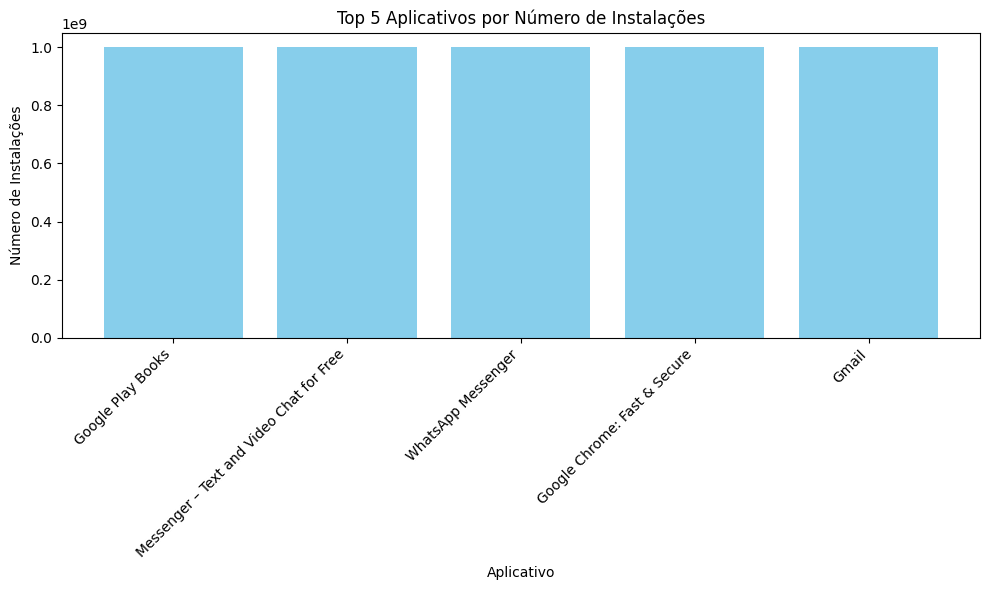

In [54]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_apps['App'], top_5_apps['Installs'], color='skyblue')
plt.title('Top 5 Aplicativos por Número de Instalações')
plt.xlabel('Aplicativo')
plt.ylabel('Número de Instalações')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

# GRÁFICO DE PIZZA COM CATEGORIAS

# Carregar o arquivo CSV

In [36]:
df_cleaned = pd.read_csv("new_googleplaystore.csv")

# Agrupar as categorias menos frequentes em uma categoria chamada "Outros"

In [37]:
categorias_outros = ['PERSONALIZATION', 'LIFESTYLE', 'COMMUNICATION', 'FINANCE', 'SPORTS',
                     'HEALTH_AND_FITNESS', 'TRAVEL_AND_LOCAL', 'SHOPPING', 'DATING',
                     'MAPS_AND_NAVIGATION', 'COMICS', 'BEAUTY', '1.9']


# Filtrar o DataFrame para incluir apenas as categorias principais


In [38]:
df_principais = df_cleaned[~df_cleaned['Category'].isin(categorias_outros)]

# Calcular a frequência da categoria "Outros"

In [39]:
frequencia_outros = df_cleaned[df_cleaned['Category'].isin(categorias_outros)].shape[0]

# Criar um novo DataFrame com as categorias agrupadas

In [40]:
df_agrupado = pd.DataFrame({'Category': ['Família e Jogos', 'Ferramentas e Produtividade',
                                         'Saúde e Bem-estar', 'Entretenimento e Mídia',
                                         'Educação e Referência', 'Outros'],
                            'Count': [df_principais[df_principais['Category'].isin(['FAMILY', 'GAME'])].shape[0],
                                      df_principais[df_principais['Category'].isin(['TOOLS', 'PRODUCTIVITY'])].shape[0],
                                      df_principais[df_principais['Category'].isin(['MEDICAL', 'HEALTH_AND_FITNESS', 'BEAUTY'])].shape[0],
                                      df_principais[df_principais['Category'].isin(['PHOTOGRAPHY', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'SOCIAL', 'COMICS'])].shape[0],
                                      df_principais[df_principais['Category'].isin(['BOOKS_AND_REFERENCE', 'EDUCATION'])].shape[0],
                                      frequencia_outros]})


# Criação do gráfico

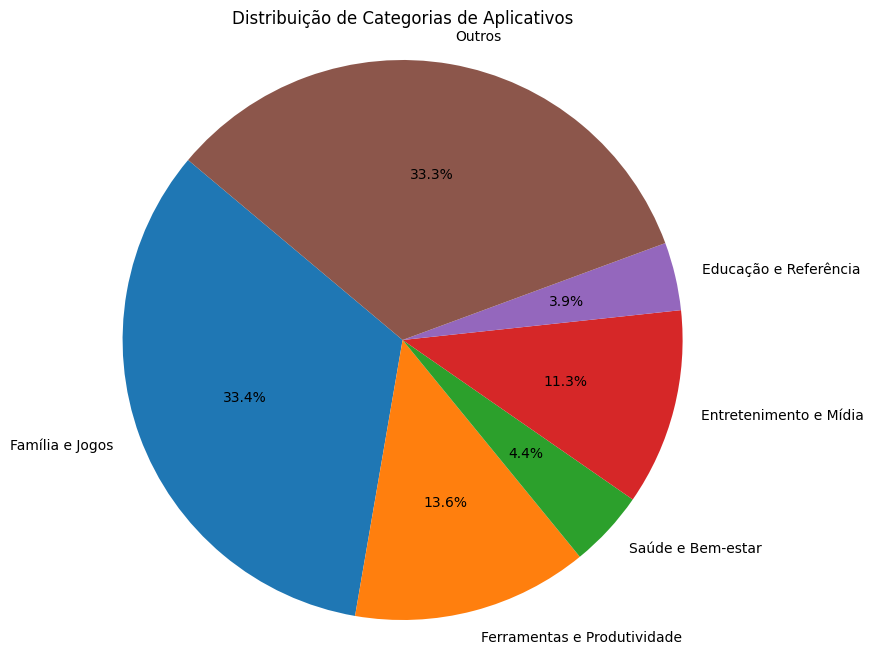

In [55]:
plt.figure(figsize=(10, 8))
plt.pie(df_agrupado['Count'], labels=df_agrupado['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Categorias de Aplicativos')
plt.axis('equal')  
plt.show()

# APP MAIS CARO EXISTENTE NO DATASET

# Ler o arquivo CSV, converter a coluna "Price" para float, remover o símbolo "$", e encontrar o aplicativo mais caro

In [56]:
df_cleaned = pd.read_csv("new_googleplaystore.csv")

df_cleaned['Price'] = df_cleaned['Price'].apply(lambda x: float(x.replace('$', '')) if '$' in x else 0)

app_mais_caro = df_cleaned[df_cleaned['Price'] == df_cleaned['Price'].max()]

print("Aplicativo mais caro:")
print(app_mais_caro[['App', 'Price']])


Aplicativo mais caro:
                           App  Price
3913  I'm Rich - Trump Edition  400.0


# QUANTOS APPS SÃO CLASSIFICADOS COMO "MATURE 17+"

# Ler o arquivo CSV, contar quantos aplicativos são classificados como "mature 17+", e exibir resultados

In [57]:

df_cleaned = pd.read_csv("new_googleplaystore.csv")

apps_mature_17plus = df_cleaned[df_cleaned['Content Rating'] == 'Mature 17+']

num_apps_mature_17plus = apps_mature_17plus.shape[0]
print("Número de aplicativos classificados como 'mature 17+':", num_apps_mature_17plus)


Número de aplicativos classificados como 'mature 17+': 447


# TOP 10 APPS POR NÚMERO DE REVIEWS

# Ler o arquivo CSV, converter a coluna 'Reviews' para tipo numérico, agrupar os aplicativos por nome e calcular o número total de reviews para cada aplicativo, e exibir resultados

In [58]:
df_cleaned = pd.read_csv("new_googleplaystore.csv")

df_cleaned['Reviews'] = pd.to_numeric(df_cleaned['Reviews'], errors='coerce')

top_apps_reviews = df_cleaned.groupby('App')['Reviews'].sum().nlargest(10)

print("Top 10 apps por número de reviews:")
print(top_apps_reviews)


Top 10 apps por número de reviews:
App
Instagram                                   199664676.0
Facebook                                    156286514.0
Subway Surfers                              138606606.0
WhatsApp Messenger                          138228988.0
Clash of Clans                              134667058.0
Messenger – Text and Video Chat for Free    113289425.0
Candy Crush Saga                            112134492.0
8 Ball Pool                                  99386198.0
Clash Royale                                 92530298.0
Snapchat                                     68045010.0
Name: Reviews, dtype: float64


# 5 APPS COM ATUALIZAÇÕES MENOS RECENTES

# Carregar o arquivo CSV, converter a coluna 'Last Updated' para o tipo datetime, e remover linhas com valores ausentes na coluna 'Last Updated'

In [59]:
df = pd.read_csv("new_googleplaystore.csv")

df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

df = df.dropna(subset=['Last Updated'])

# Selecionar os 5 apps com atualizações menos recentes, e imprimir os resultados

In [60]:
top_5_old_apps = df.nsmallest(5, 'Last Updated')

print("Top 5 Apps com Atualizações Menos Recentes:")
print(top_5_old_apps[['App', 'Last Updated']])

Top 5 Apps com Atualizações Menos Recentes:
                            App Last Updated
7010  FML F*ck my life + widget   2010-05-21
6961   CJ Poker Odds Calculator   2011-01-30
9800   FD Shift Calendar Widget   2011-03-16
7947      DEER HUNTER CHALLENGE   2011-04-11
7613                Freecell CY   2011-04-16


# Criação do gráfico de linhas

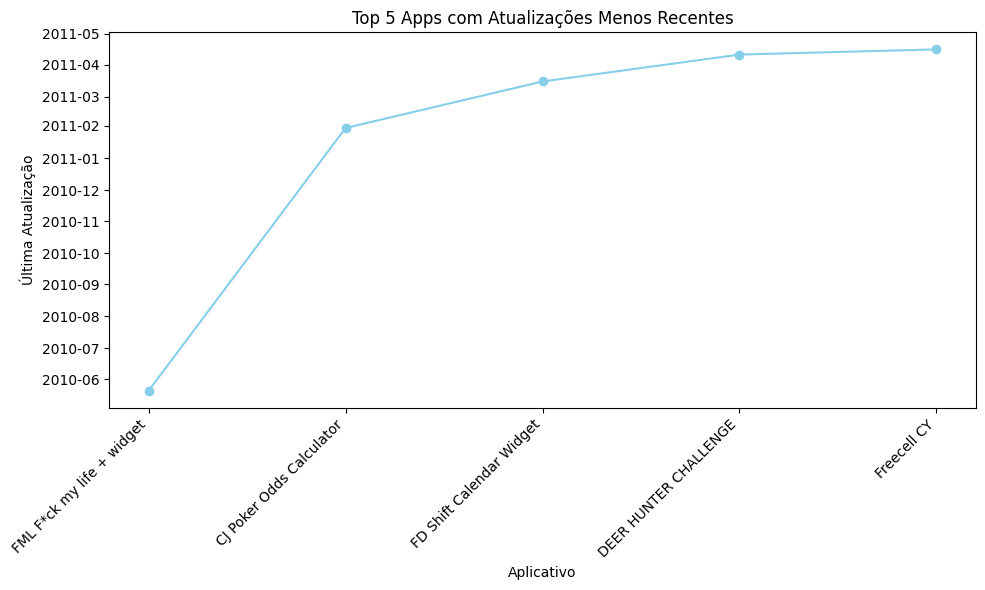

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(top_5_old_apps['App'], top_5_old_apps['Last Updated'], marker='o', color='skyblue')
plt.title('Top 5 Apps com Atualizações Menos Recentes')
plt.xlabel('Aplicativo')
plt.ylabel('Última Atualização')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


# TOP 10 MAIORES APPS (MB)

# Carregar o arquivo CSV, remover caracteres não numéricos da coluna 'Size', e converter a coluna 'Size' para tipo numérico

In [62]:
df = pd.read_csv("new_googleplaystore.csv")

df['Size'] = df['Size'].str.replace('M', '').str.replace('k', '')
df['Size'] = df['Size'].replace('Varies with device', 'NaN')

df['Size'] = pd.to_numeric(df['Size'], errors='coerce')


# Selecionar os 10 maiores apps por tamanho, e imprimir resultados

In [63]:
top_10_largest_apps = df.nlargest(10, 'Size')

print("Top 10 Maiores Apps:")
print(top_10_largest_apps[['App', 'Size']])

Top 10 Maiores Apps:
                            App    Size
10315      Word Search Tab 1 FR  1020.0
8402                      DTPay   994.0
9920              FH Calculator   992.0
7398            CT - DTC Lookup   986.0
6332   Battery Notifier BT Free   982.0
8929            EI HabitTracker   981.0
2229    Super Ear Super Hearing   980.0
5326                Dynamics AX   976.0
2228                Fever Meter   975.0
9435                EU IP Codes   970.0


# Criação do gráfico de dispersão

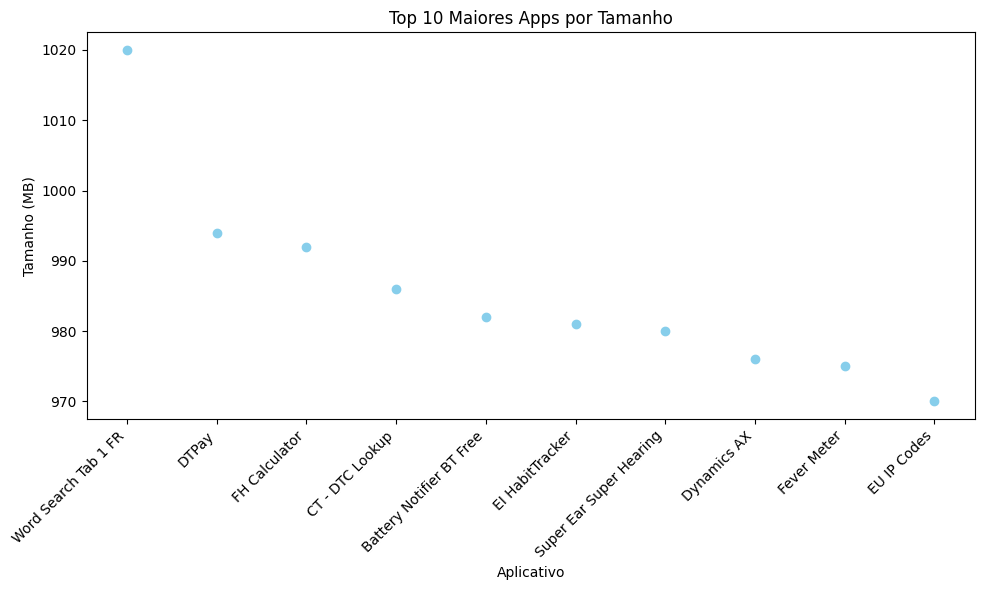

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(top_10_largest_apps['App'], top_10_largest_apps['Size'], color='skyblue')
plt.title('Top 10 Maiores Apps por Tamanho')
plt.xlabel('Aplicativo')
plt.ylabel('Tamanho (MB)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()
